In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
"""from crccheck.crc import Crc
def crc(mess):
    byte_data = np.packbits(mess).tobytes()
    my_crc = Crc(width=24,poly=0x1FFF409,initvalue=0,xor_output=0,reflect_input=False,reflect_output=False)
    checksum = my_crc.calc(byte_data)
    checksum = format(checksum,"024b")
    checksum = np.array([int(b) for b in checksum], dtype=np.uint8)
    bits = np.concatenate((mess,checksum))
    return bits"""

'from crccheck.crc import Crc\ndef crc(mess):\n    byte_data = np.packbits(mess).tobytes()\n    my_crc = Crc(width=24,poly=0x1FFF409,initvalue=0,xor_output=0,reflect_input=False,reflect_output=False)\n    checksum = my_crc.calc(byte_data)\n    checksum = format(checksum,"024b")\n    checksum = np.array([int(b) for b in checksum], dtype=np.uint8)\n    bits = np.concatenate((mess,checksum))\n    return bits'

In [3]:
"""def jelgenerator(amp):
    preamble = amp*np.array([1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0])
    df = np.array([1,0,0,0,1])
    random = np.random.randint(0,2,83)
    mess = np.concatenate((df,random))
    mess =crc(mess)
    mess = amp*mess
    mess_new = np.array(preamble)
    for n in range(112):
        if mess[n] == 0:
            mess_new = np.append(mess_new,0)
            mess_new = np.append(mess_new,amp)
        else:
            mess_new = np.append(mess_new,amp)
            mess_new = np.append(mess_new,0)
    mess = mess_new
    Ps = np.sum(mess**2)/len(mess)
    Ps = 10*np.log10(Ps)
    return mess,Ps"""

'def jelgenerator(amp):\n    preamble = amp*np.array([1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0])\n    df = np.array([1,0,0,0,1])\n    random = np.random.randint(0,2,83)\n    mess = np.concatenate((df,random))\n    mess =crc(mess)\n    mess = amp*mess\n    mess_new = np.array(preamble)\n    for n in range(112):\n        if mess[n] == 0:\n            mess_new = np.append(mess_new,0)\n            mess_new = np.append(mess_new,amp)\n        else:\n            mess_new = np.append(mess_new,amp)\n            mess_new = np.append(mess_new,0)\n    mess = mess_new\n    Ps = np.sum(mess**2)/len(mess)\n    Ps = 10*np.log10(Ps)\n    return mess,Ps'

In [4]:
"""def zajgenerator (Ps,SNR,length):
    sigma_negyzet = Ps-SNR
    sigma_negyzet = 10**(sigma_negyzet/10)
    sigma = np.sqrt(sigma_negyzet)
    noise = np.random.normal(0,sigma,length)
    Pn = np.sum(noise**2)/length
    return noise,Pn"""

'def zajgenerator (Ps,SNR,length):\n    sigma_negyzet = Ps-SNR\n    sigma_negyzet = 10**(sigma_negyzet/10)\n    sigma = np.sqrt(sigma_negyzet)\n    noise = np.random.normal(0,sigma,length)\n    Pn = np.sum(noise**2)/length\n    return noise,Pn'

In [5]:
"""def tesztjel(Ps,SNR):
    amp = np.sqrt(2*(10**(Ps/10)))
    sig,Psig = jelgenerator(amp)
    noise,Pn = zajgenerator(Ps,SNR,len(sig))
    Pn = 10*np.log10(Pn)
    SNR_ = Psig-Pn
    s_n = sig+noise
    p = np.sum(s_n**2)/len(s_n)
    p = 10*np.log10(p)
    return s_n,SNR_,p"""

'def tesztjel(Ps,SNR):\n    amp = np.sqrt(2*(10**(Ps/10)))\n    sig,Psig = jelgenerator(amp)\n    noise,Pn = zajgenerator(Ps,SNR,len(sig))\n    Pn = 10*np.log10(Pn)\n    SNR_ = Psig-Pn\n    s_n = sig+noise\n    p = np.sum(s_n**2)/len(s_n)\n    p = 10*np.log10(p)\n    return s_n,SNR_,p'

In [6]:
"""def tesztjelek(x,SNR,Ps):
    iq_samples = np.array([0])
    avgSNR = avgP = 0
    for i in range(x):
        sig, SNR_sig, p_sig = tesztjel(Ps,SNR)   
        noise,Pn = zajgenerator(Ps,SNR,120)
        iq_samples = np.append(iq_samples,sig)
        iq_samples = np.append(iq_samples,noise)
        avgSNR = avgSNR + SNR_sig
        avgP = avgP + p_sig
    avgSNR = avgSNR/x
    avgP = avgP/x
    return iq_samples, avgSNR,avgP"""

'def tesztjelek(x,SNR,Ps):\n    iq_samples = np.array([0])\n    avgSNR = avgP = 0\n    for i in range(x):\n        sig, SNR_sig, p_sig = tesztjel(Ps,SNR)   \n        noise,Pn = zajgenerator(Ps,SNR,120)\n        iq_samples = np.append(iq_samples,sig)\n        iq_samples = np.append(iq_samples,noise)\n        avgSNR = avgSNR + SNR_sig\n        avgP = avgP + p_sig\n    avgSNR = avgSNR/x\n    avgP = avgP/x\n    return iq_samples, avgSNR,avgP'

In [7]:
"""import numpy as np
x = y = np.zeros(10)
for i in range(1,11):
    mess,Ps = jelgenerator(i)
    x = np.append(x,i)
    y = np.append(y,Ps)
plt.plot(x,y,marker = "o")
Ps = 5
SNR = 3
noise,Pn = zajgenerator(Ps,SNR,240)
print(Pn,len(noise))
amp = 10
jel, Ps = jelgenerator(amp)
Ps_ = 10*np.log10((amp**2)/2)
print(Ps_,Ps)

Ps = 100
SNR = 100
teszt,snr,p = tesztjel(Ps,SNR)
dev_snr = 100*np.abs(SNR-snr)/SNR
dev_ps = 100*np.abs(Ps-p)/Ps
print(dev_snr,dev_ps)
## fontos hogy némi pontatlanság miatt tizedes rendű eltérések vannak így nagyobb szintekre pontosabb, 10 alatt akár 40%, 100 körül már 1% alatt

Ps = 80
SNR = 50
x = 1000
iq_samples,snr,p = tesztjelek(x,SNR,Ps)


print(len(iq_samples),snr,p)
dev_snr = 100*abs(SNR-snr)/SNR
dev_p = 100*abs(Ps-p)/Ps
print(dev_snr,dev_p)
"""

'import numpy as np\nx = y = np.zeros(10)\nfor i in range(1,11):\n    mess,Ps = jelgenerator(i)\n    x = np.append(x,i)\n    y = np.append(y,Ps)\nplt.plot(x,y,marker = "o")\nPs = 5\nSNR = 3\nnoise,Pn = zajgenerator(Ps,SNR,240)\nprint(Pn,len(noise))\namp = 10\njel, Ps = jelgenerator(amp)\nPs_ = 10*np.log10((amp**2)/2)\nprint(Ps_,Ps)\n\nPs = 100\nSNR = 100\nteszt,snr,p = tesztjel(Ps,SNR)\ndev_snr = 100*np.abs(SNR-snr)/SNR\ndev_ps = 100*np.abs(Ps-p)/Ps\nprint(dev_snr,dev_ps)\n## fontos hogy némi pontatlanság miatt tizedes rendű eltérések vannak így nagyobb szintekre pontosabb, 10 alatt akár 40%, 100 körül már 1% alatt\n\nPs = 80\nSNR = 50\nx = 1000\niq_samples,snr,p = tesztjelek(x,SNR,Ps)\n\n\nprint(len(iq_samples),snr,p)\ndev_snr = 100*abs(SNR-snr)/SNR\ndev_p = 100*abs(Ps-p)/Ps\nprint(dev_snr,dev_p)\n'

In [7]:
from ber_snr import fgv
%load_ext autoreload
%autoreload 2
start = 10
stop = 25
delta = 1
ps = 95
x = 1000
snr_p95_x1000,ber_p95_x1000 = fgv(start,stop,delta,ps,x)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2.5e-07
remainder 4258386
remainder 1350548
remainder 6183002
remainder 7640820
remainder 9634958
remainder 3073132
remainder 11519730
remainder 3165444
remainder 10082528
remainder 13471057
remainder 7525965
remainder 6719076
remainder 10741787
remainder 4504706
remainder 5781685
remainder 7689105
remainder 9731752
remainder 6763455
remainder 6196913
remainder 12358883
remainder 12048581
remainder 6527640
remainder 12102363
remainder 14358918
remainder 12045988
remainder 9045891
remainder 2200968
remainder 11407580
remainder 8273925
remainder 13200577
remainder 16061761
remainder 4803281
remainder 1399022
remainder 12704008
remainder 963891
remainder 2611246
remainder 10322898
remainder 1333817
remainder 11826366
remainder 10862259
remainder 2514380
remainder 16176017
remainder 8625956
remainder 44975
remainder 1752197
remainder 1133009
remainder 9619235
remainder 15590252
remainder 4512691
remaind

KeyboardInterrupt: 

In [23]:
start = 10
stop = 25
delta = 1
ps = 15
x = 1000
snr_p15_x1000,ber_p15_x1000 = fgv(start,stop,delta,ps,x)

2.5e-07
2.5e-07
2.5e-07
2.5e-07
2.5e-07
2.5e-07
2.5e-07
2.5e-07
2.5e-07
2.5e-07
2.5e-07
2.5e-07
2.5e-07
2.5e-07
2.5e-07


In [5]:
from ber_snr import fgv

start = 15
stop = 25
delta = 1
ps = 15
x = 100
snr_p15_x100,ber_p15_x100 = fgv(start,stop,delta,ps,x)

2.5e-07
remainder 14080482
remainder 7831835
remainder 10747594
remainder 2047483
remainder 9923286
remainder 13928655
remainder 13269534
remainder 3112738
remainder 14153777
remainder 13408250
remainder 16081795
remainder 7332954
remainder 16775927
remainder 7403304
remainder 7256420
remainder 16213913
remainder 6206824
remainder 1739508
remainder 15337940
remainder 15812641
remainder 3535570
remainder 13385701
remainder 7977768
remainder 16378066
remainder 13505191
remainder 13836971
remainder 14801460
remainder 1026476
remainder 8618873
remainder 15638279
remainder 14115822
remainder 8635878
remainder 682325
remainder 3737266
remainder 8267048
remainder 11863476
remainder 9548181
remainder 12192886
remainder 4030830
remainder 9632874
remainder 7716543
remainder 2614500
remainder 10624158
remainder 7952585
remainder 4971085
remainder 11557056
remainder 2493442
remainder 14112173
remainder 15325701
remainder 10628186
remainder 12419425
remainder 560244
remainder 2456091
remainder 1012

KeyboardInterrupt: 

NameError: name 'snr_p95_x1000' is not defined

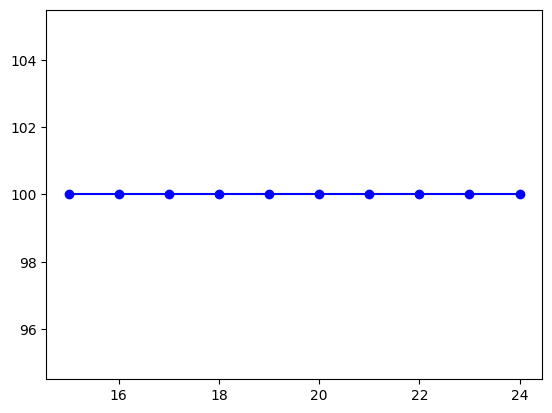

In [4]:
plt.plot(snr_p15_x100[1:],ber_p15_x100[1:],'b',marker="o",label="P15,X100")
plt.plot(snr_p95_x1000[1:],ber_p95_x1000[1:],'g',marker="o",label="P95,X1000")
plt.plot(snr_p15_x1000[1:],ber_p15_x1000[1:],'r',marker="o",label="P15,X1000")
plt.legend()
plt.xlabel("SNR [dB]")
plt.ylabel("Csomaghiba-arány [%]")
plt.title("Csomaghiba-arány [%], kétszer akkora zajjal az üzenetek közt, 240")
print(snr_p15_x100[1:],ber_p15_x100[1:],snr_p95_x1000[1:],ber_p95_x1000[1:],snr_p15_x1000[1:],ber_p15_x1000[1:],)

[ 0 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [100.   99.6  98.5  96.1  93.5  86.   72.5  61.2  48.3  34.4  22.6  16.7
   9.    5.4   4.4   1.8]


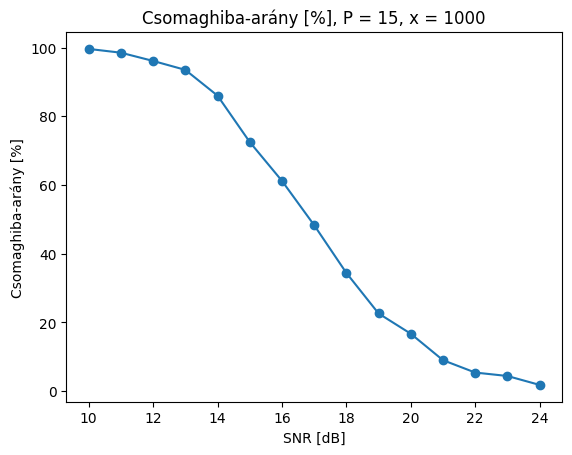

In [6]:
snr_p15 = snr
ber_p15 = ber
plt.plot(snr_p15[1:],ber_p15[1:],marker="o")
plt.xlabel("SNR [dB]")
plt.ylabel("Csomaghiba-arány [%]")
plt.title("Csomaghiba-arány [%], P = 15, x = 1000")
print(snr_p15,ber_p15)